<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 2</h2></center>

<center><h3>Grading Table</h3></center>

<table>
  <col>
  <colgroup span="3"></colgroup>
  <colgroup span="2"></colgroup>
  <tr>
    <td rowspan="1"></td>
    <th colspan="1" scope="colgroup">Part 1</th>>
    <th colspan="1" scope="colgroup">Part 2</th>
    <th colspan="1" scope="colgroup">Total</th>
  </tr>
  <tr>
    <th scope="row">Points</th>
    <td>50</td>
    <td>50</td>
    <td>100</td>
  </tr>
</table>

In [70]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, neighbors, cluster
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import pandas as pd

# Part 1 - K Nearest Neighbors

We will use the famous iris dataset in this part.

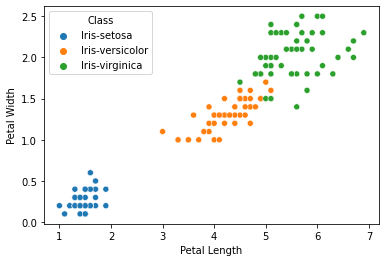

In [71]:
df = pd.read_csv('iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
sns.scatterplot('Petal Length', 'Petal Width', data=df, hue='Class')
plt.show()

In [72]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 1

Split the dataset into train and test sets.

In [73]:
x = df.drop("Class", axis = 1).values
y = df["Class"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.25)

### Step 2

Standardize the dataset

In [74]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Step 3

Write your custom KNN class

In [75]:
def euclideanDistance(x1, x2):
        return np.sum((x1-x2)**2, axis=1)

def most_common(listy):
    return max(set(listy), key = listy.count)

class CustomKNN:
    def __init__(self,k, dist_metric=euclideanDistance):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, x_scaled_train, y_train):
        self.x_scaled_train = x_scaled_train
        self.y_train = y_train
    
    def predict(self,x_scaled_test):
        n = []
        for x in x_scaled_test:
            distances = self.dist_metric(x, self.x_scaled_train)
            s = [y for _, y in sorted(zip(distances, self.y_train))]
            n.append(s[:self.k])
        return list(map(most_common, n))    
        
    def score(self, x_scaled_test, y_test):
        y_pred = self.predict(x_scaled_test)
        score = sum(y_pred == y_test) / len(y_test)
        return score

### Step 4

Fit the training data to model

In [76]:
knn = CustomKNN(5)
knn.fit(x_train_scaled, y_train)

### Step 5

Evaluate the accuracy

In [77]:
knn.score(x_test_scaled, y_test)

0.9736842105263158

### Step 6

Use sklearn's KNN classifier and compare the results

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train_scaled, y_train)
neigh.score(x_test_scaled, y_test)

0.9736842105263158

### Step 7

We have gathered 5 unknown samples below. Predict which sample belongs to which category. <br>
*Hint: You can use classifier.predict(x) method.* <br>
**Extra:** Indicate the probability of prediction.


| Sepal Length | Sepal Width | Petal Length | Petal Width | Class | 
| :-: | :-: | :-: | :-: | :-: |
| 4.5 | 3.0 | 1.5 | 0.5 | Unknown |
| 7.0 | 3.0 | 5.0 | 1.5 | Unknown |
| 6.0 | 2.5 | 5.0 | 2.0 | Unknown |
| 7.0 | 3.0 | 4.5 | 1.0 | Unknown |
| 6.0 | 2.0 | 5.0 | 1.5 | Unknown |

In [80]:
t1 = scaler.transform([[4.5, 3.0, 1.5, 0.5]])
t2 = scaler.transform([[7.0, 3.0, 5.0, 1.5]])
t3 = scaler.transform([[6.0, 2.5, 5.0, 2.0]])
t4 = scaler.transform([[7.0, 3.0, 4.5, 1.0]])
t5 = scaler.transform([[6.0, 2.0, 5.0, 1.5]])

print(knn.predict(t1))
print(knn.predict(t2))
print(knn.predict(t3))
print(knn.predict(t4))
print(knn.predict(t5))
print("\n")
print(neigh.predict(t1))
print(neigh.predict(t2))
print(neigh.predict(t3))
print(neigh.predict(t4))
print(neigh.predict(t5))

['Iris-setosa']
['Iris-versicolor']
['Iris-virginica']
['Iris-versicolor']
['Iris-versicolor']


['Iris-setosa']
['Iris-versicolor']
['Iris-virginica']
['Iris-versicolor']
['Iris-versicolor']


# Part 2 - K-Means Clustering

## Dataset
<br>
We use dataset from https://www.kaggle.com/kandij/mall-customers throughout this notebook.

In [81]:
df = pd.read_csv("segmented_customers-2.csv")
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Step 1
<br>
For this part, we will only use Age and Spending Score columns.
<br>
Plot the dataframe so that "Age" column is on the x axis and "Spending Score (1-100)" is on the y axis.

(200,)

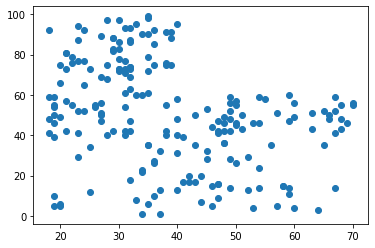

In [134]:
x = df["Age"]
y = df["Spending Score (1-100)"]
plt.scatter(x, y)
x.shape

### Step 2
<br>
Implement your own simple Kmeans algorithm without using pre-implemented libraries for KMeans. You can 
refer to the structure below while structuring your code. You do not have to use the same structure. 
Any type of initialization method for your centroids is accepted. You will solely be graded on whether or not your algorithm performs as expected, we will not take the accuracy into account as long as the algorithm gives meaningful results.

In [159]:
def kmeans(X, k, max_iterations=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    for i in range(max_iterations):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
        assignments = np.argmin(distances, axis=0)
        for j in range(k):
            points = X[assignments == j, :]
            if points.shape[0] > 0:
                centroids[j, :] = np.mean(points, axis=0)
    return centroids, assignments

def inertia(X,k):
    centers,assign = kmeans(X,k)
    tt = 0
    for i in range(len(centers)):
        t = 0  
        for j in range(len(assign)):
            if assign[j] == i:
                t += ((X[j][0] - centers[i][0]) ** 2 + (x[j][1] - centers[i][1]) ** 2) ** 0.5
        tt += t
    return tt

### Step 3
<br>
After you complete your algorithm, test it for number of clusters between 1-15. Use elbow method to decide on the
best number of clusters. For the best number of clusters you chose, visualize the clusters and centroids. Comment on your results, what improvements can be made on the algorithm?

In [160]:
scaler = StandardScaler()
x = np.c_[scaler.fit_transform(df["Age"].values.reshape(-1,1)),scaler.fit_transform(df["Spending Score (1-100)"].values.reshape(-1,1))]

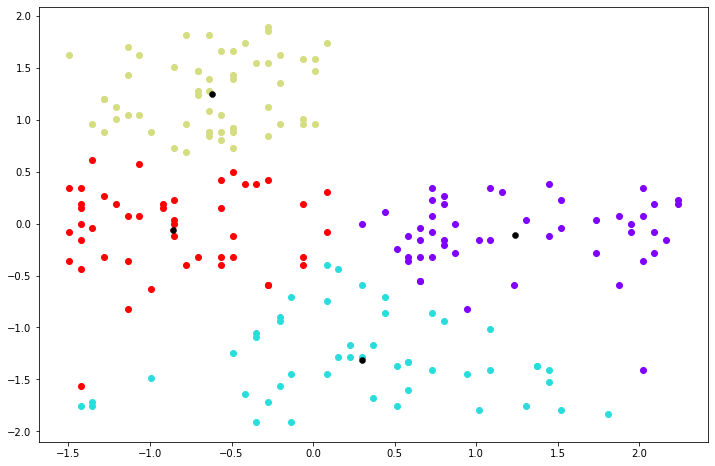

In [178]:
k = 4
centroids, assignments = kmeans(x, k)
fig,ax = plt.subplots(figsize = (12,8))
color = cm.rainbow(np.linspace(0,1,k))
for i in range(len(assignments)):
    ax.scatter(x[i][0], x[i][1], color = color[assignments[i]])
for i in centroids:
    ax.scatter(i[0], i[1], color = "black", linewidth = 0.5)

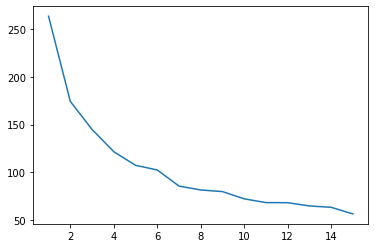

In [186]:
a = []
in_list = []
for i in range(1,16):
    a.append(i)
    in_list.append(inertia(x, i))
    
plt.plot(a, in_list)

### Step 4
<br>
Use scikit-learn's KMeans class to compare your results with the optimized KMeans algrorithm. Compare it for number of clusters between 1-15 and plot the inertias (hint: you can use scikit-learn's "inertia_" parameter.). Comment on your results.  

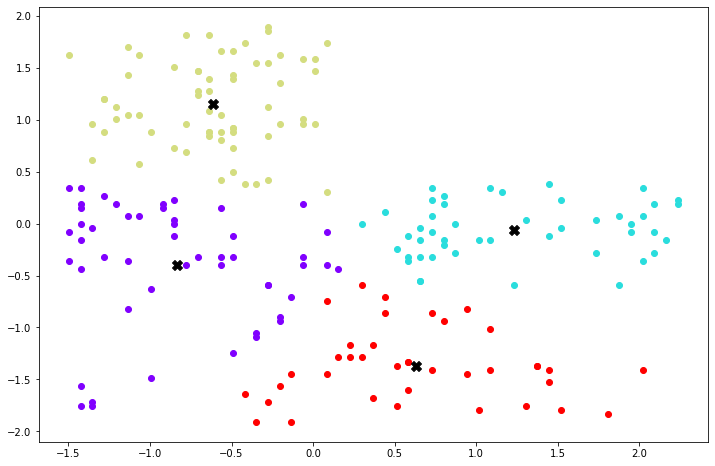

In [179]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
y_kmeans = km.fit_predict(x)
fig, ax = plt.subplots(figsize = (12,8))
color = cm.rainbow(np.linspace(0,1,4))
for i in range(len(y_kmeans)):
    ax.scatter(x[i][0], x[i][1], color = color[y_kmeans[i]])
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, -1], s=100, marker = "X", c = "black")

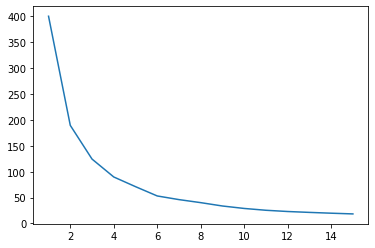

In [189]:
ine_list = []
b = []
for i in range(1,16):
    kme = KMeans(n_clusters = i).fit(x)
    ine_list.append(kme.inertia_)
    b.append(i)
    
plt.plot(a, ine_list)